In [36]:
%pip install pandas
%pip install 'SQLAlchemy==1.4.46'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'SQLAlchemy==1.4.46'"


In [37]:
import pandas as pd
import numpy as np

### First we need to upload the data from sql database

In [38]:
df_asylum = pd.read_sql_table('asylum_applications', 'sqlite:///../data/data.sqlite')
df_temp = pd.read_sql_table('global_temperature', 'sqlite:///../data/data.sqlite')

# Quick look for the data

In [39]:
df_asylum.head()

,Year,Country of origin,Country of asylum,applied
0,2006,Afghanistan,Australia,14
1,2006,Albania,Australia,21
2,2006,Algeria,Australia,5
3,2006,Egypt,Australia,38
4,2006,Bahrain,Australia,11


In [88]:
df_asylum_plus_one = df_asylum
df_asylum_plus_one['Year'] = df_asylum_plus_one["Year"]+1
df_asylum_plus_one

,Year,Country of origin,Country of asylum,applied
0,2007,Afghanistan,Australia,14
1,2007,Albania,Australia,21
2,2007,Algeria,Australia,5
3,2007,Egypt,Australia,38
4,2007,Bahrain,Australia,11
...,...,...,...,...
47747,2006,Sri Lanka,Thailand,5
47748,2006,Myanmar,Thailand,28
47749,2006,Viet Nam,Thailand,5
47750,2006,Morocco,Turkey,5


In [40]:
df_temp.head()

,dt,AverageTemperature,Country,Year
0,2000-01-01,0.197,Åland,2000
1,2000-02-01,-0.023,Åland,2000
2,2000-03-01,0.615,Åland,2000
3,2000-04-01,4.124,Åland,2000
4,2000-05-01,8.557,Åland,2000


## We are checking for null or NaN values

In [41]:
df_asylum.isnull().sum()

Year                 0
Country of origin    0
Country of asylum    0
applied              0
dtype: int64

In [42]:
df_asylum.isna().sum()

Year                 0
Country of origin    0
Country of asylum    0
applied              0
dtype: int64

In [43]:
df_temp.isnull().sum()

dt                      0
AverageTemperature    156
Country                 0
Year                    0
dtype: int64

In [44]:
df_temp.isna().sum()

dt                      0
AverageTemperature    156
Country                 0
Year                    0
dtype: int64

### We dive into Null values in df_temp dataframe to understand the situation

In [45]:
df_temp[df_temp['AverageTemperature'].isna() == True]

,dt,AverageTemperature,Country,Year
1404,2000-01-01,NaN,Antarctica,2000
1405,2000-02-01,NaN,Antarctica,2000
1406,2000-03-01,NaN,Antarctica,2000
1407,2000-04-01,NaN,Antarctica,2000
1408,2000-05-01,NaN,Antarctica,2000
...,...,...,...,...
1555,2012-08-01,NaN,Antarctica,2012
1556,2012-09-01,NaN,Antarctica,2012
1557,2012-10-01,NaN,Antarctica,2012
1558,2012-11-01,NaN,Antarctica,2012


#### It seems that NaN values occur only for the Antarctica.
Below we are checking if there is any other country that has the same issue.

In [46]:
df_temp[df_temp['AverageTemperature'].isna() == True]['Country'].unique()

array(['Antarctica'], dtype=object)

#### Since only Antarctica has NaN values and Antarctica is not very important for the project's sake we don't take further steps.

## Checking if we have the year range we wanted in both data

In [47]:
np.sort(df_asylum['Year'].unique())

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012], dtype=int64)

In [48]:
np.sort(df_temp['Year'].unique())

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012], dtype=int64)

## Getting the unique values in country columns

In [49]:
np.sort(df_asylum['Country of origin'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', "Dem. People's Rep. of Korea",
       'Dem. Rep. of the Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'Gambia'

In [50]:
np.sort(df_temp['Country'].unique())

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic Of The)', 'Costa Rica', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', "Côte D'Ivoire",
       'Denmark', 'Denmark (Europe)', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'E

## Getting the country values both datasets share.
### We can work on these countries

In [51]:
country_intersect = np.intersect1d(ar1=df_asylum['Country of origin'].unique(), ar2=df_temp['Country'].unique())
country_intersect

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Djibouti',
       'Dominica', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Lesotho'

### Number of shared country values by both datasets

In [52]:
len(country_intersect)

154

In [74]:
most_effected_countries = [
    "South Sudan",
    "Madagascar",
    "Pakistan",
    "Somalia",
    "Sudan",
    "Chad",
    "Burkina Faso",
    "Niger",
    "Mali",
    "El Salvador",
    "Honduras",
    "Guatemala"]
print(most_effected_countries)




['South Sudan', 'Madagascar', 'Pakistan', 'Somalia', 'Sudan', 'Chad', 'Burkina Faso', 'Niger', 'Mali', 'El Salvador', 'Honduras', 'Guatemala']


In [54]:
most_effected_countries_in_dataset = []
for country in most_effected_countries:
    if country in country_intersect:
        print(country)
        most_effected_countries_in_dataset.append(country)

Madagascar
Pakistan
Somalia
Sudan
Chad
Burkina Faso
Niger
Mali
El Salvador
Honduras
Guatemala


In [55]:
most_effected_countries_in_dataset

['Madagascar',
 'Pakistan',
 'Somalia',
 'Sudan',
 'Chad',
 'Burkina Faso',
 'Niger',
 'Mali',
 'El Salvador',
 'Honduras',
 'Guatemala']

In [56]:
df_temp.head()

,dt,AverageTemperature,Country,Year
0,2000-01-01,0.197,Åland,2000
1,2000-02-01,-0.023,Åland,2000
2,2000-03-01,0.615,Åland,2000
3,2000-04-01,4.124,Åland,2000
4,2000-05-01,8.557,Åland,2000


In [57]:
df_temp1 = df_temp[["Country","Year"]]
df_temp1

,Country,Year
0,Åland,2000
1,Åland,2000
2,Åland,2000
3,Åland,2000
4,Åland,2000
...,...,...
37903,Zimbabwe,2012
37904,Zimbabwe,2012
37905,Zimbabwe,2012
37906,Zimbabwe,2012


In [58]:
df_temp1 = df_temp[["Country","AverageTemperature", "Year"]]
df_temp1 = df_temp1.groupby(by=["Country"]).sum()
df_temp1

,AverageTemperature,Year
Country,,
Afghanistan,2393.817,312936
Africa,3886.857,312936
Albania,2115.390,312936
Algeria,3782.848,312936
American Samoa,4249.586,312936
...,...,...
Western Sahara,3655.565,312936
Yemen,4251.461,312936
Zambia,3419.491,312936


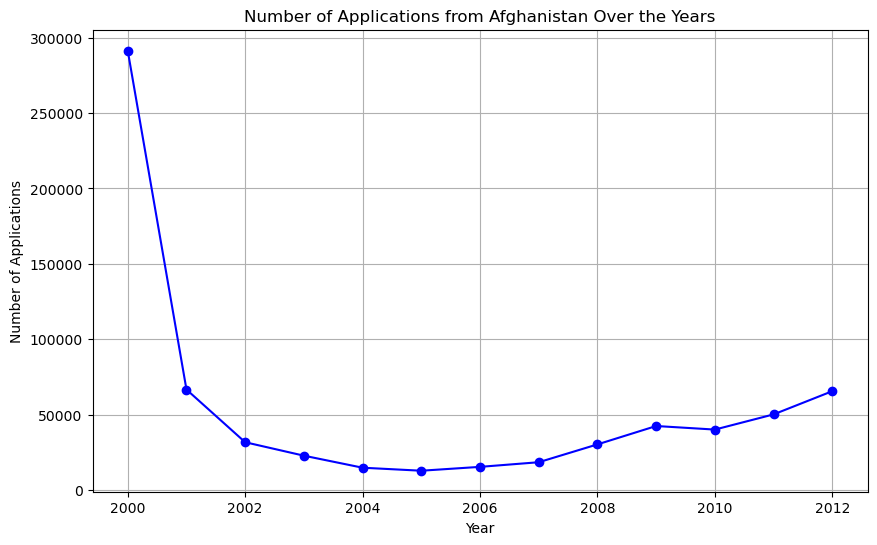

In [59]:
import matplotlib.pyplot as plt

# Assuming df_asylum is your DataFrame

# Filter the DataFrame for rows where the "Country of origin" is "Afghanistan"
df_afghanistan = df_asylum[df_asylum["Country of origin"] == "Afghanistan"]

# Group by "Year" and sum the "applied" values
applied_by_year = df_afghanistan.groupby(by=["Year"]).sum()["applied"]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(applied_by_year.index, applied_by_year.values, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Number of Applications from Afghanistan Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Applications')

# Show grid
plt.grid(True)

# Display the plot
plt.show()


In [60]:
df_temp1 = df_temp[["AverageTemperature", "Country", "Year"]]
#df_temp1 = df_temp1.groupby(by = ["Year"]).sum()
df_temp1

,AverageTemperature,Country,Year
0,0.197,Åland,2000
1,-0.023,Åland,2000
2,0.615,Åland,2000
3,4.124,Åland,2000
4,8.557,Åland,2000
...,...,...,...
37903,18.946,Zimbabwe,2012
37904,22.609,Zimbabwe,2012
37905,23.482,Zimbabwe,2012
37906,24.606,Zimbabwe,2012


In [61]:
df_afghanistan_temp1 = df_temp1[df_temp1["Country"] == "Afghanistan"]
applied_by_year_temp1 = df_afghanistan_temp1.groupby(by=["Year"])["AverageTemperature"].sum()
applied_by_year_temp1

Year
2000    185.974
2001    189.337
2002    186.452
2003    178.992
2004    189.251
2005    179.760
2006    187.147
2007    181.274
2008    182.598
2009    183.093
2010    189.944
2011    186.216
2012    173.779
Name: AverageTemperature, dtype: float64

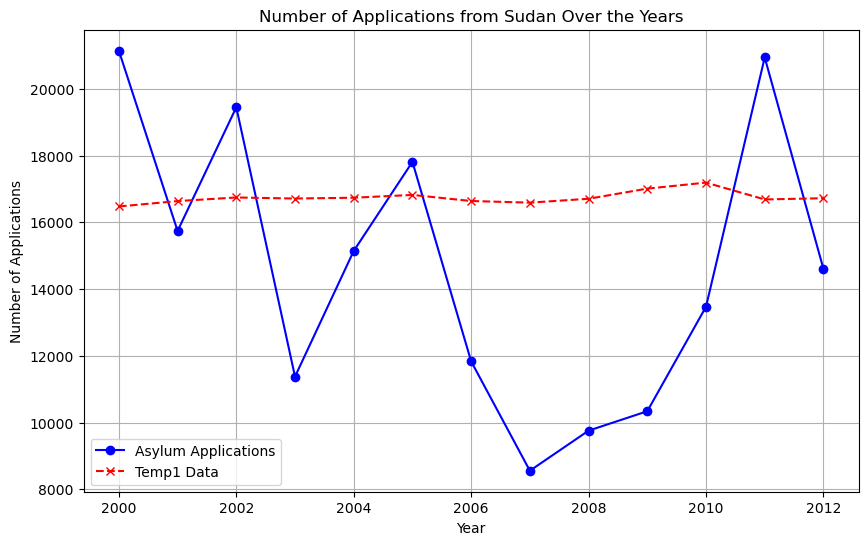

In [84]:
import matplotlib.pyplot as plt

# Assuming df_asylum and df_temp1 are your DataFrames

# Filter and group the data for Afghanistan from df_asylum
df_afghanistan_asylum = df_asylum[df_asylum["Country of origin"] == "Sudan"]
applied_by_year_asylum = df_afghanistan_asylum.groupby(by=["Year"]).sum()["applied"]

# Filter and group the data for Afghanistan from df_temp1
df_afghanistan_temp1 = df_temp1[df_temp1["Country"] == "Sudan"]
applied_by_year_temp1 = df_afghanistan_temp1.groupby(by=["Year"])["AverageTemperature"].sum()*50

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the first data series
plt.plot(applied_by_year_asylum.index, applied_by_year_asylum.values, marker='o', linestyle='-', color='b', label='Asylum Applications')

# Plot the second data series
plt.plot(applied_by_year_temp1.index, applied_by_year_temp1.values, marker='x', linestyle='--', color='r', label='Temp1 Data')

# Add title and labels
plt.title('Number of Applications from Sudan Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Applications')

# Add a legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()



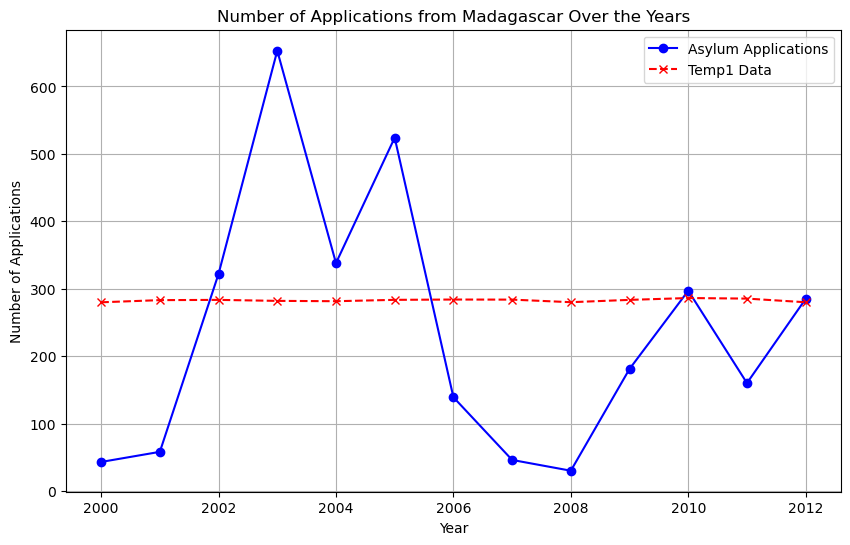

In [63]:
import matplotlib.pyplot as plt

# Assuming df_asylum and df_temp1 are your DataFrames

# Filter and group the data for Afghanistan from df_asylum
df_afghanistan_asylum = df_asylum[df_asylum["Country of origin"] == "Madagascar"]
applied_by_year_asylum = df_afghanistan_asylum.groupby(by=["Year"]).sum()["applied"]

# Filter and group the data for Afghanistan from df_temp1
df_afghanistan_temp1 = df_temp1[df_temp1["Country"] == "Madagascar"]
applied_by_year_temp1 = df_afghanistan_temp1.groupby(by=["Year"])["AverageTemperature"].sum()*1

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the first data series
plt.plot(applied_by_year_asylum.index, applied_by_year_asylum.values, marker='o', linestyle='-', color='b', label='Asylum Applications')

# Plot the second data series
plt.plot(applied_by_year_temp1.index, applied_by_year_temp1.values, marker='x', linestyle='--', color='r', label='Temp1 Data')

# Add title and labels
plt.title('Number of Applications from Madagascar Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Applications')

# Add a legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()


In [64]:
df_afghanistan_temp1 = df_temp1[df_temp1["Country"] == "Madagascar"]
applied_by_year_temp1 = df_afghanistan_temp1.groupby(by=["Year"])["AverageTemperature"].sum()*1
applied_by_year_temp1

Year
2000    279.844
2001    283.043
2002    283.410
2003    281.943
2004    281.436
2005    283.462
2006    283.934
2007    283.797
2008    279.987
2009    283.424
2010    286.154
2011    285.322
2012    279.904
Name: AverageTemperature, dtype: float64

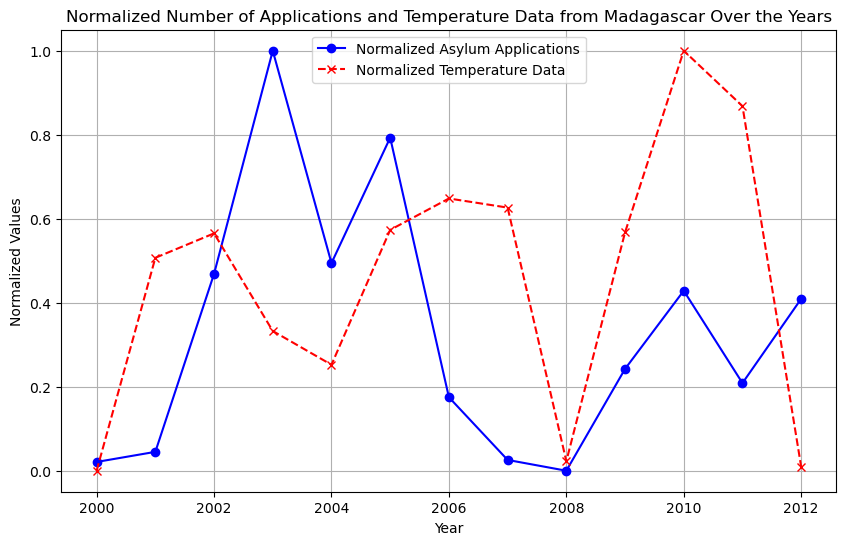

In [65]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming df_asylum and df_temp1 are your DataFrames

# Filter and group the data for Afghanistan from df_asylum
df_afghanistan_asylum = df_asylum[df_asylum["Country of origin"] == "Madagascar"]
applied_by_year_asylum = df_afghanistan_asylum.groupby(by=["Year"]).sum()["applied"]

# Filter and group the data for Afghanistan from df_temp1
df_afghanistan_temp1 = df_temp1[df_temp1["Country"] == "Madagascar"]
applied_by_year_temp1 = df_afghanistan_temp1.groupby(by=["Year"])["AverageTemperature"].sum()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the asylum applications data
applied_by_year_asylum_normalized = scaler.fit_transform(applied_by_year_asylum.values.reshape(-1, 1)).flatten()

# Normalize the temperature data
applied_by_year_temp1_normalized = scaler.fit_transform(applied_by_year_temp1.values.reshape(-1, 1)).flatten()

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the first data series (normalized asylum applications)
plt.plot(applied_by_year_asylum.index, applied_by_year_asylum_normalized, marker='o', linestyle='-', color='b', label='Normalized Asylum Applications')

# Plot the second data series (normalized temperature data)
plt.plot(applied_by_year_temp1.index, applied_by_year_temp1_normalized, marker='x', linestyle='--', color='r', label='Normalized Temperature Data')

# Add title and labels
plt.title('Normalized Number of Applications and Temperature Data from Madagascar Over the Years')
plt.xlabel('Year')
plt.ylabel('Normalized Values')

# Add a legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()


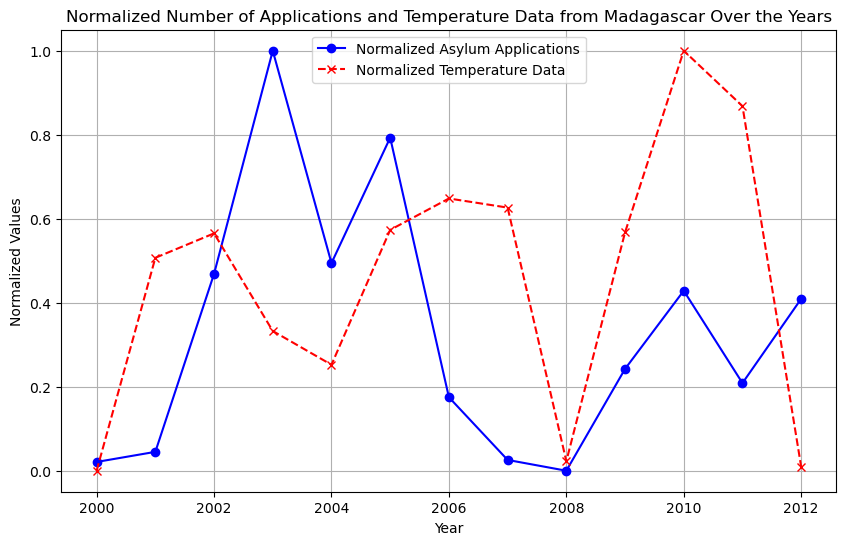

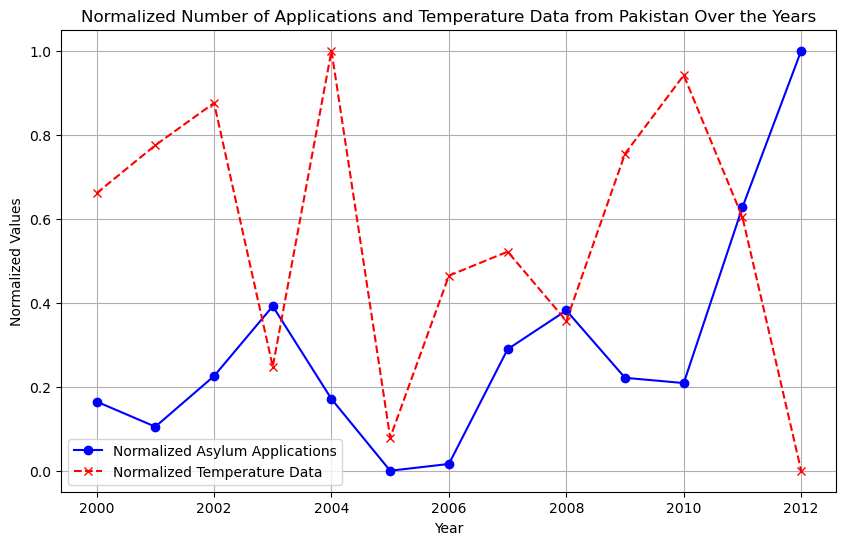

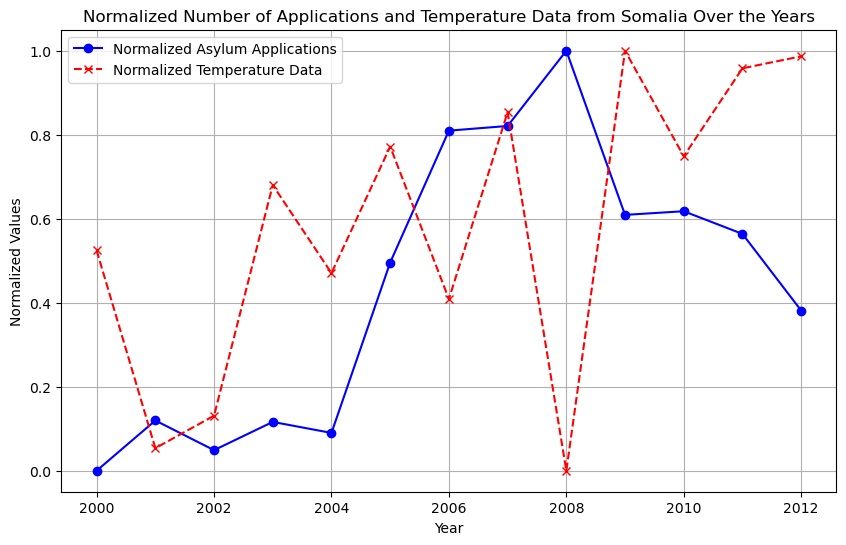

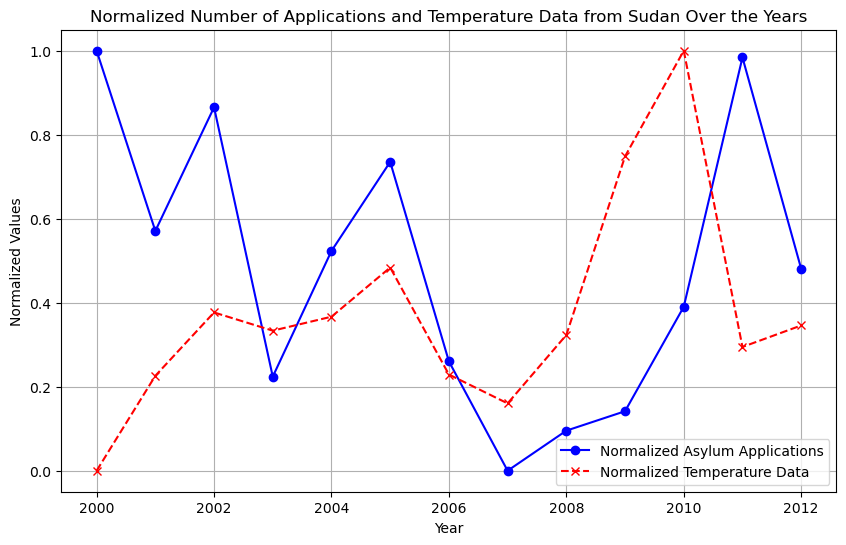

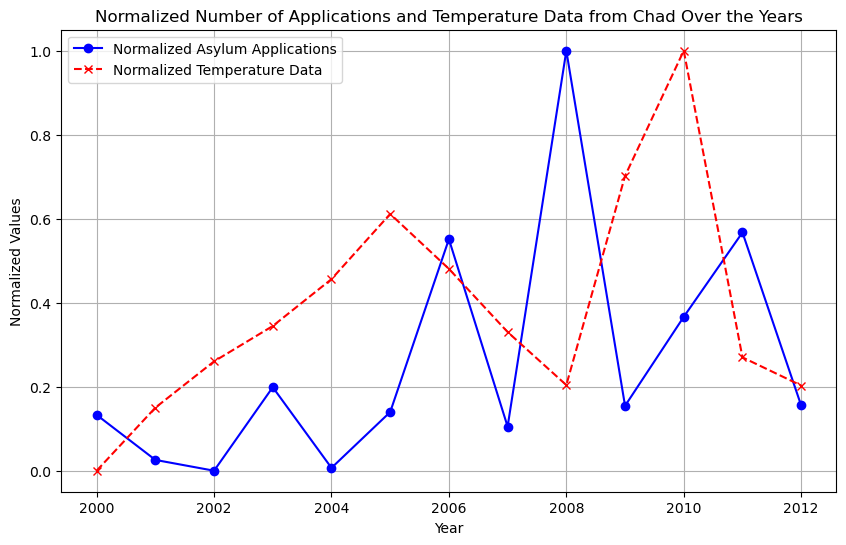

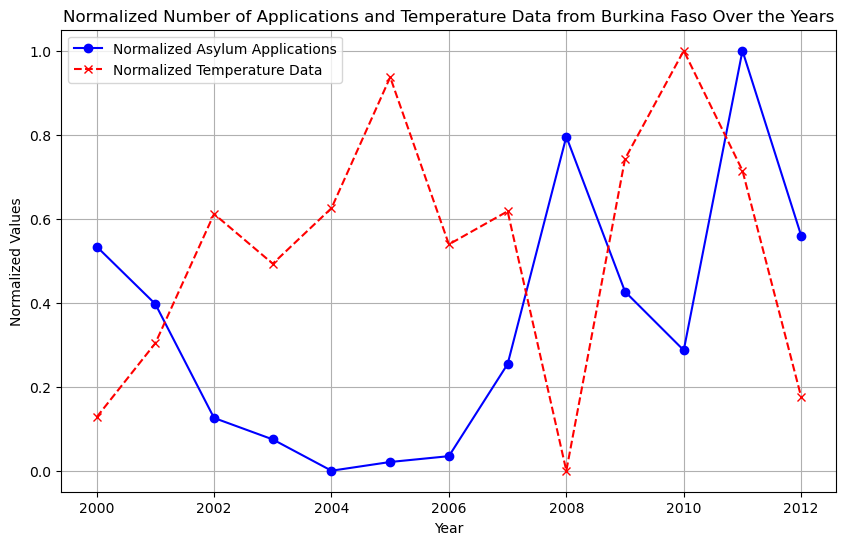

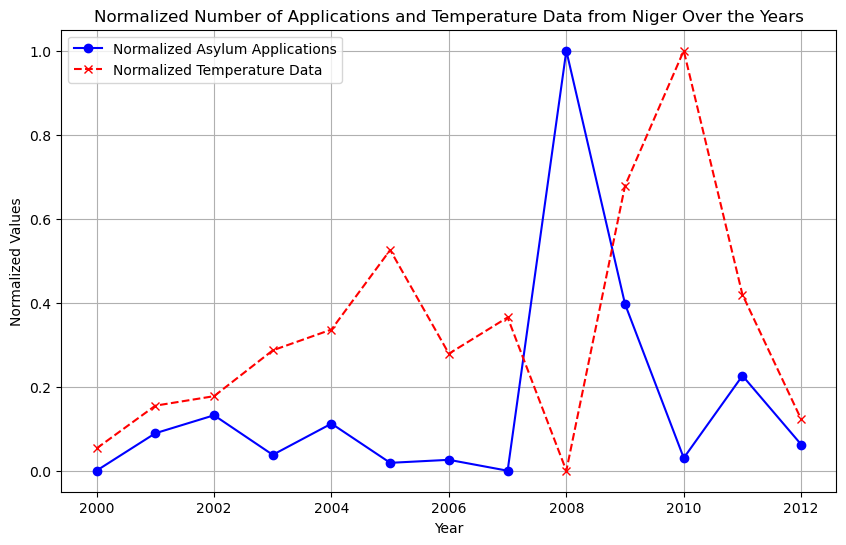

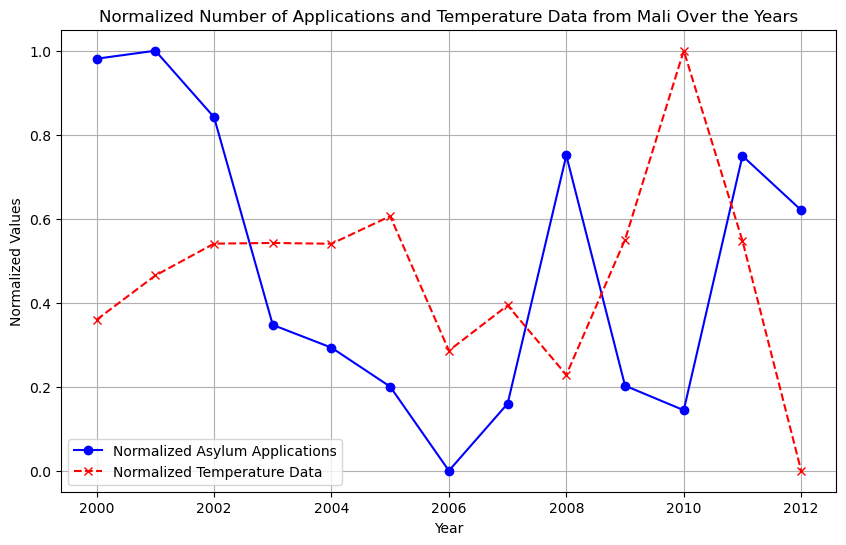

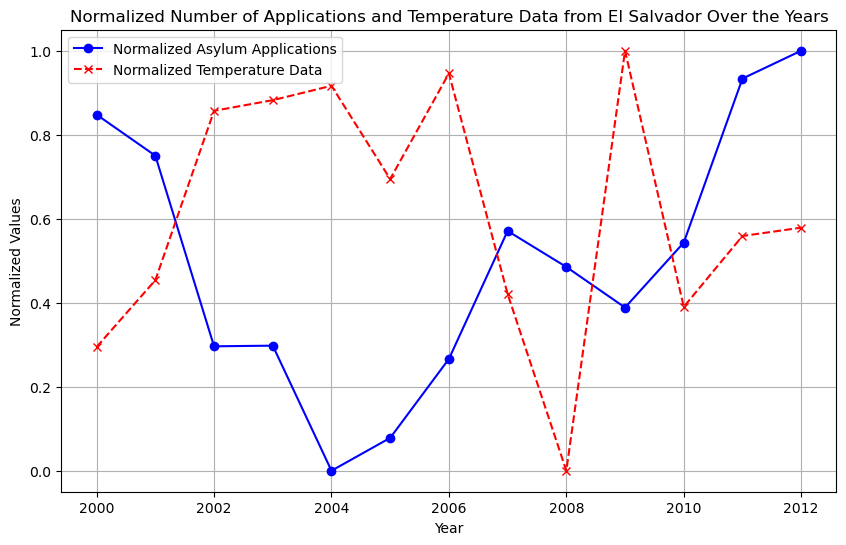

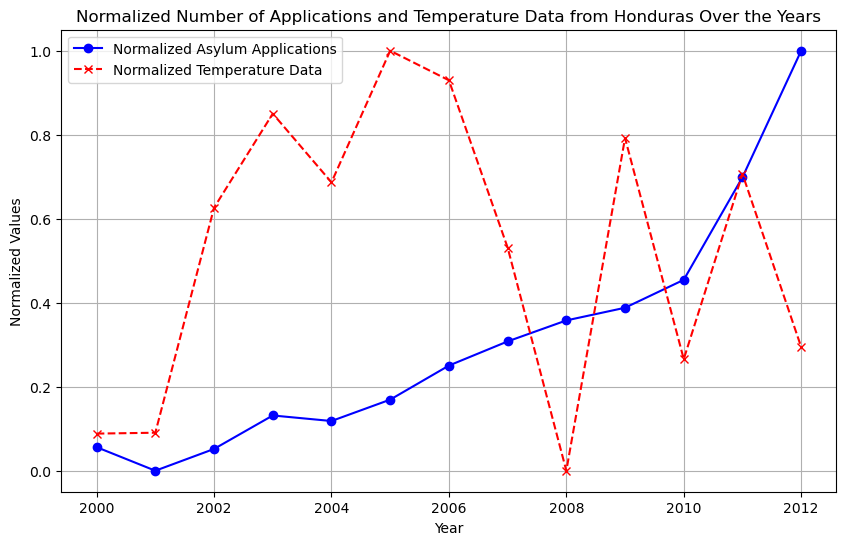

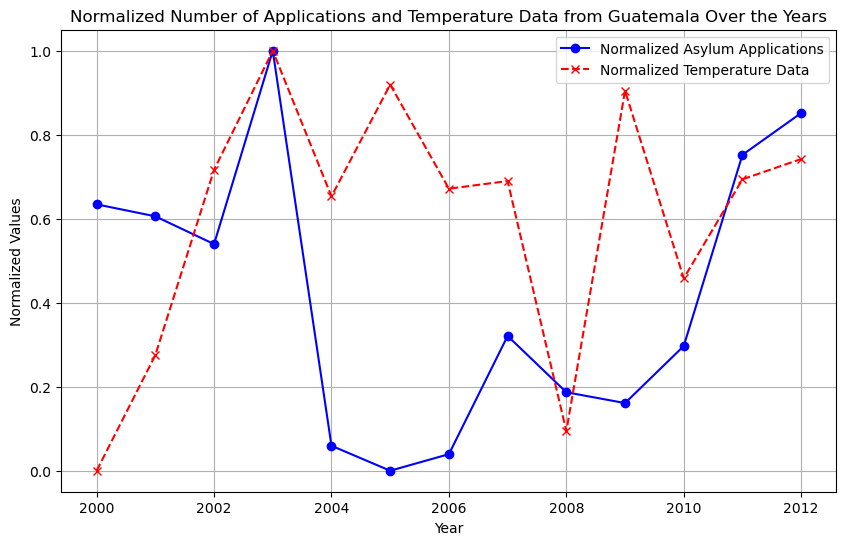

In [66]:
for country in most_effected_countries_in_dataset:
    
    # Filter and group the data for Afghanistan from df_asylum
    df_afghanistan_asylum = df_asylum[df_asylum["Country of origin"] == country]
    applied_by_year_asylum = df_afghanistan_asylum.groupby(by=["Year"]).sum()["applied"]

    # Filter and group the data for Afghanistan from df_temp1
    df_afghanistan_temp1 = df_temp1[df_temp1["Country"] == country]
    applied_by_year_temp1 = df_afghanistan_temp1.groupby(by=["Year"])["AverageTemperature"].sum()

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Normalize the asylum applications data
    applied_by_year_asylum_normalized = scaler.fit_transform(applied_by_year_asylum.values.reshape(-1, 1)).flatten()

    # Normalize the temperature data
    applied_by_year_temp1_normalized = scaler.fit_transform(applied_by_year_temp1.values.reshape(-1, 1)).flatten()

    # Plot the data
    plt.figure(figsize=(10, 6))

    # Plot the first data series (normalized asylum applications)
    plt.plot(applied_by_year_asylum.index, applied_by_year_asylum_normalized, marker='o', linestyle='-', color='b', label='Normalized Asylum Applications')

    # Plot the second data series (normalized temperature data)
    plt.plot(applied_by_year_temp1.index, applied_by_year_temp1_normalized, marker='x', linestyle='--', color='r', label='Normalized Temperature Data')

    # Add title and labels
    plt.title('Normalized Number of Applications and Temperature Data from ' + country +' Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Normalized Values')

    # Add a legend
    plt.legend()

    # Show grid
    plt.grid(True)

    # Display the plot
    plt.show()

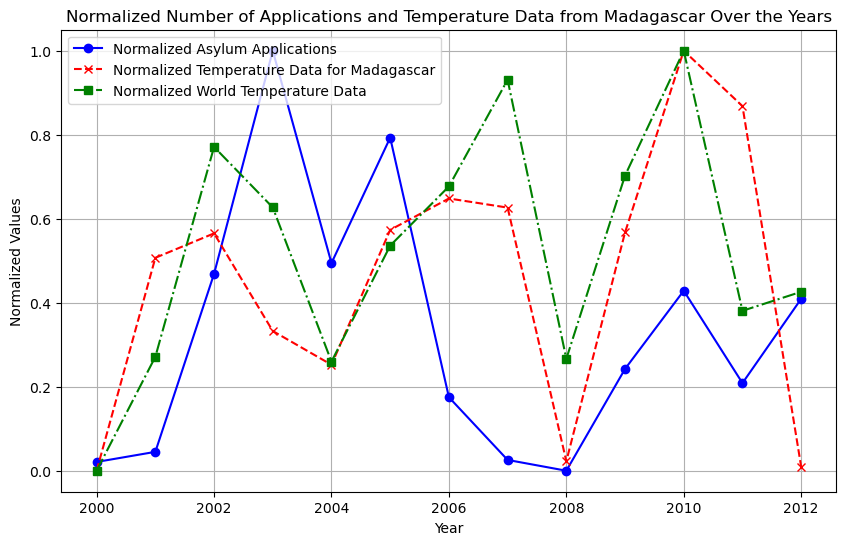

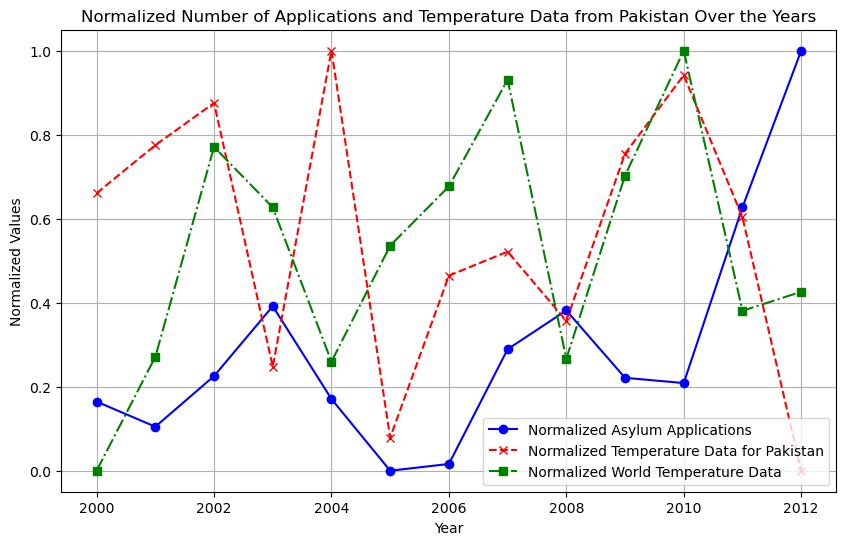

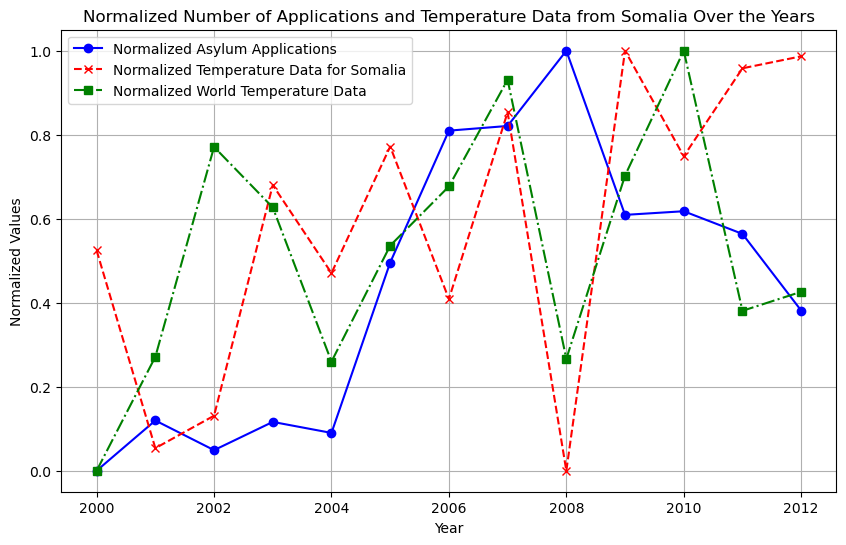

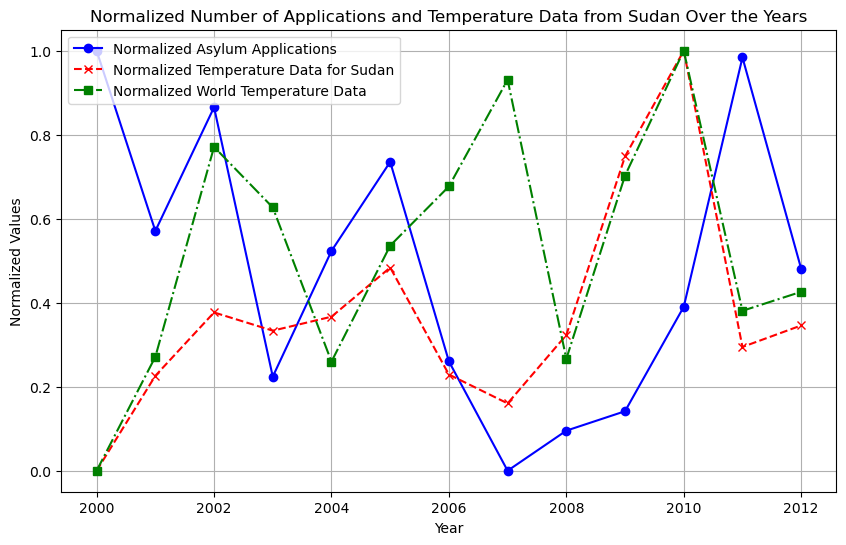

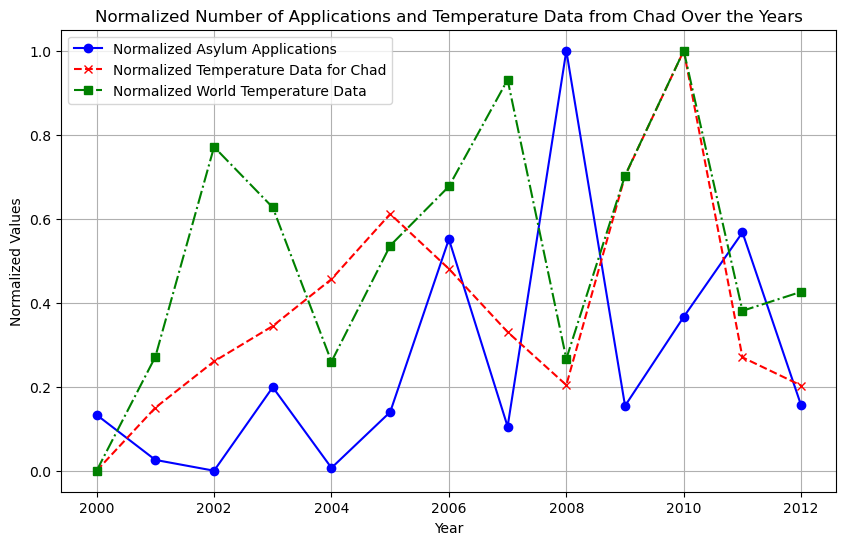

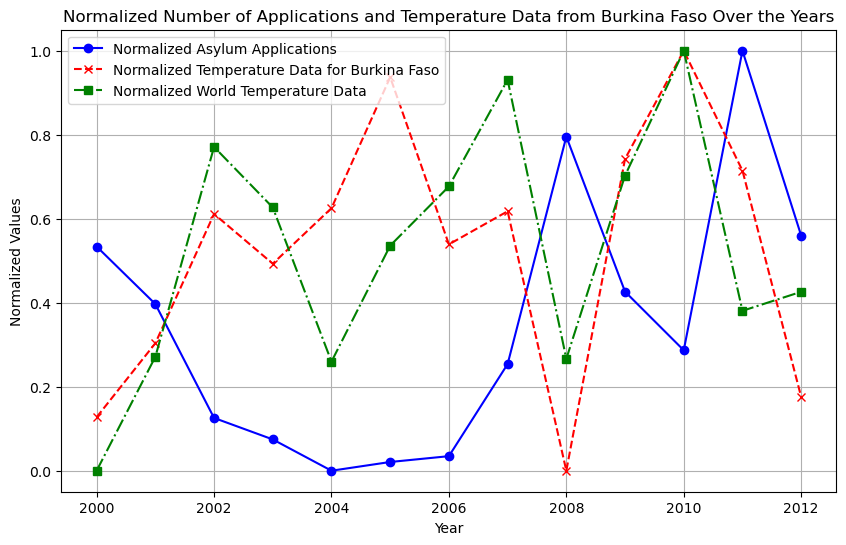

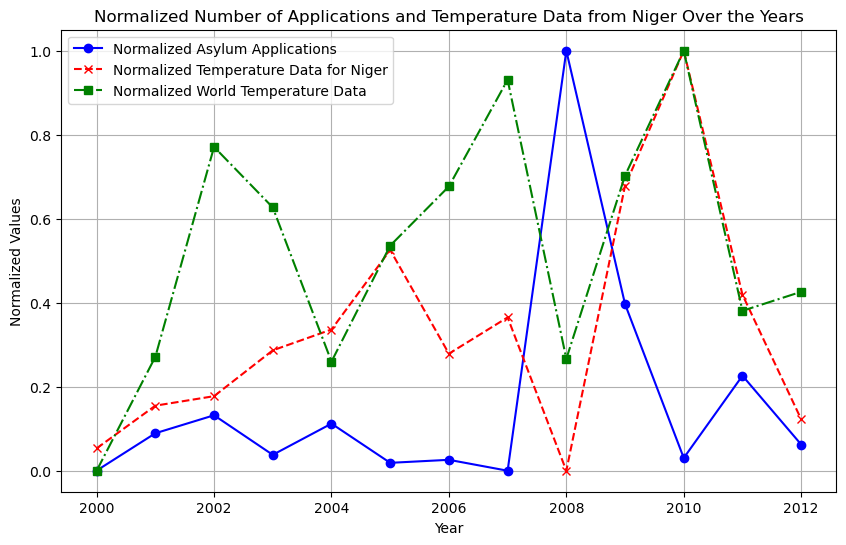

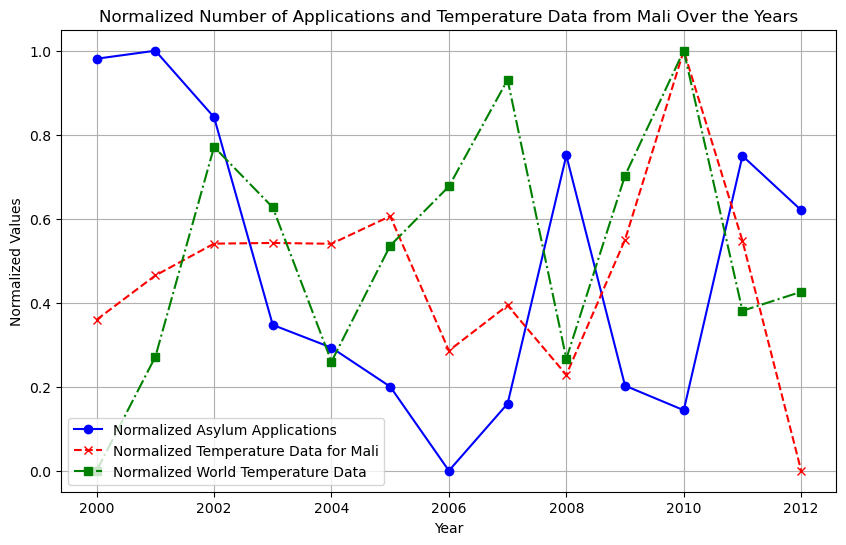

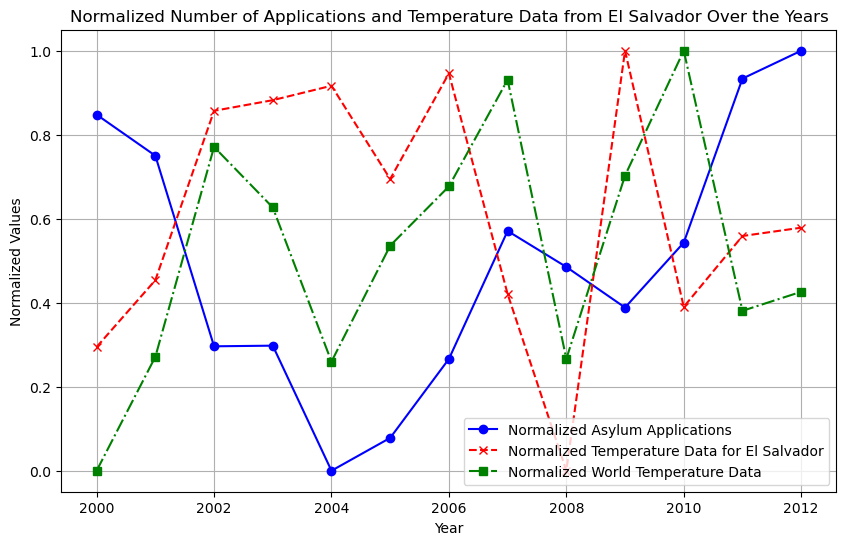

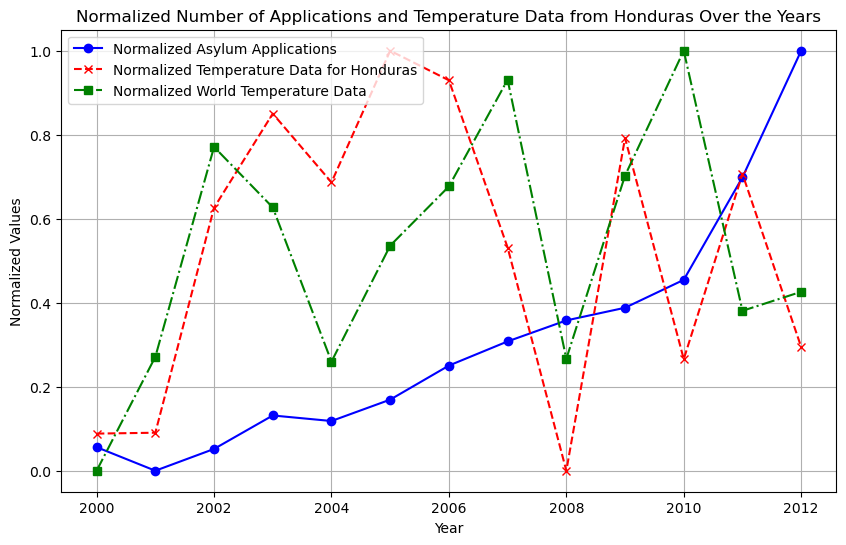

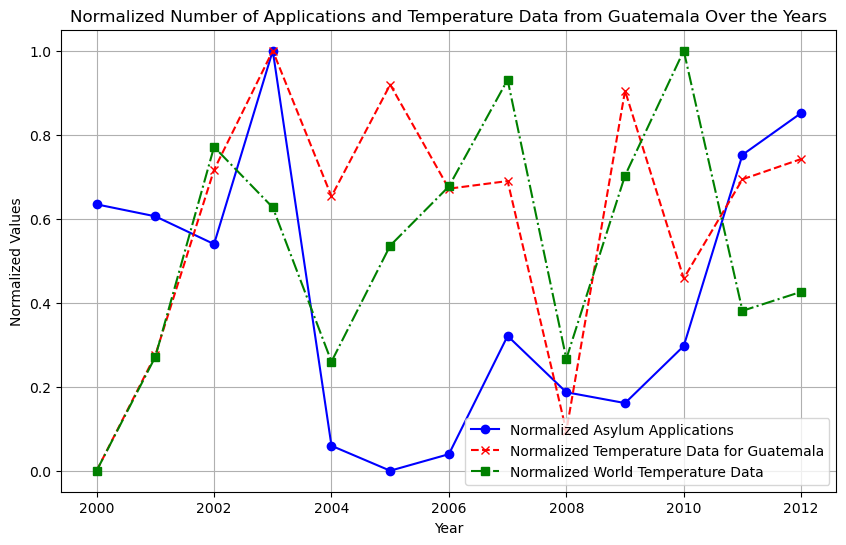

In [67]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Example data
# df_asylum and df_temp1 should already be defined
# most_effected_countries_in_dataset should be a list of countries

# Calculate the total world temperature by year
total_world_temperature_by_year = df_temp1.groupby(by=["Year"])["AverageTemperature"].mean()

# Initialize the MinMaxScaler for the total world temperature
scaler_world_temp = MinMaxScaler()

# Normalize the total world temperature data
total_world_temperature_normalized = scaler_world_temp.fit_transform(total_world_temperature_by_year.values.reshape(-1, 1)).flatten()

for country in most_effected_countries_in_dataset:
    
    # Filter and group the data for the country from df_asylum
    df_country_asylum = df_asylum[df_asylum["Country of origin"] == country]
    applied_by_year_asylum = df_country_asylum.groupby(by=["Year"]).sum()["applied"]

    # Filter and group the data for the country from df_temp1
    df_country_temp1 = df_temp1[df_temp1["Country"] == country]
    applied_by_year_temp1 = df_country_temp1.groupby(by=["Year"])["AverageTemperature"].mean()

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Normalize the asylum applications data
    applied_by_year_asylum_normalized = scaler.fit_transform(applied_by_year_asylum.values.reshape(-1, 1)).flatten()

    # Normalize the temperature data
    applied_by_year_temp1_normalized = scaler.fit_transform(applied_by_year_temp1.values.reshape(-1, 1)).flatten()

    # Plot the data
    plt.figure(figsize=(10, 6))

    # Plot the first data series (normalized asylum applications)
    plt.plot(applied_by_year_asylum.index, applied_by_year_asylum_normalized, marker='o', linestyle='-', color='b', label='Normalized Asylum Applications')

    # Plot the second data series (normalized country temperature data)
    plt.plot(applied_by_year_temp1.index, applied_by_year_temp1_normalized, marker='x', linestyle='--', color='r', label='Normalized Temperature Data for ' + country)

    # Plot the third data series (normalized world temperature data)
    plt.plot(total_world_temperature_by_year.index, total_world_temperature_normalized, marker='s', linestyle='-.', color='g', label='Normalized World Temperature Data')

    # Add title and labels
    plt.title('Normalized Number of Applications and Temperature Data from ' + country + ' Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Normalized Values')

    # Add a legend
    plt.legend()

    # Show grid
    plt.grid(True)

    # Display the plot
    plt.show()


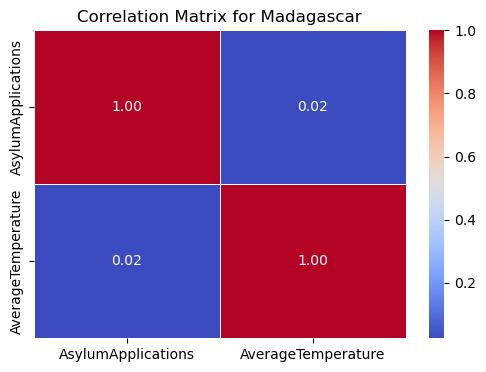

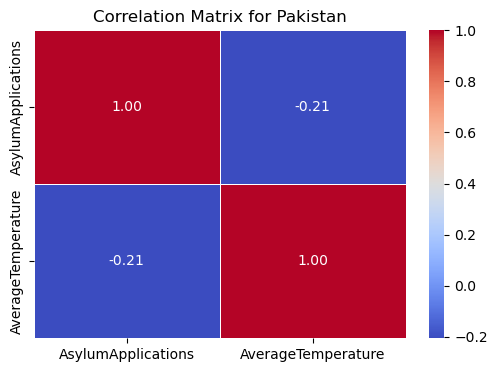

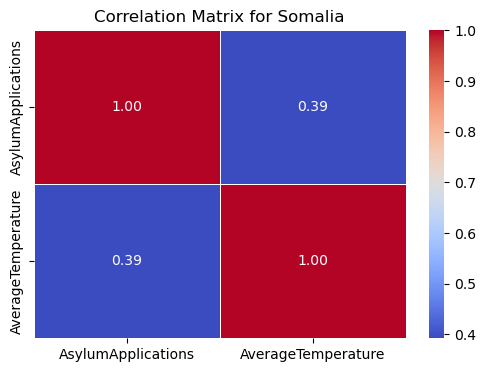

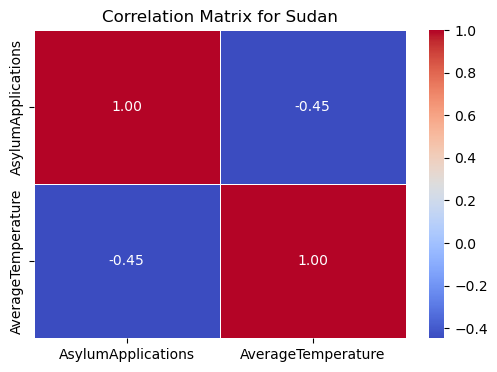

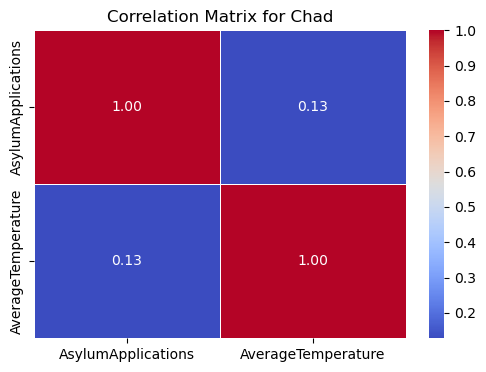

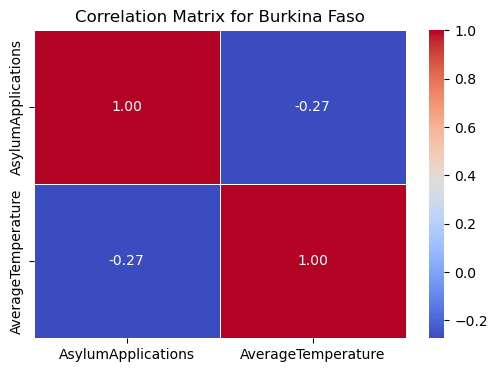

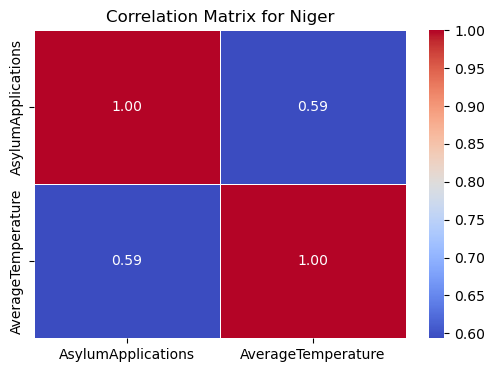

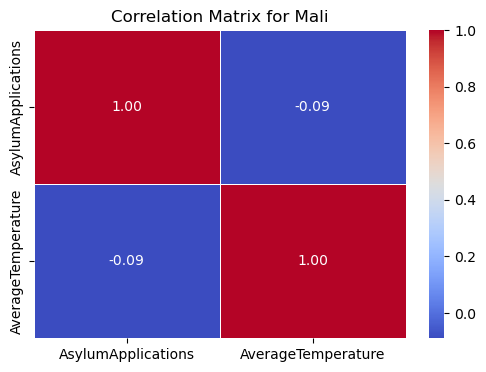

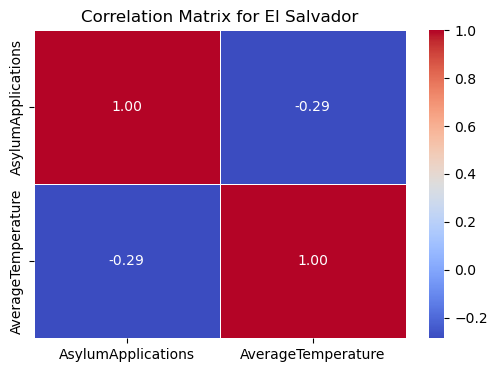

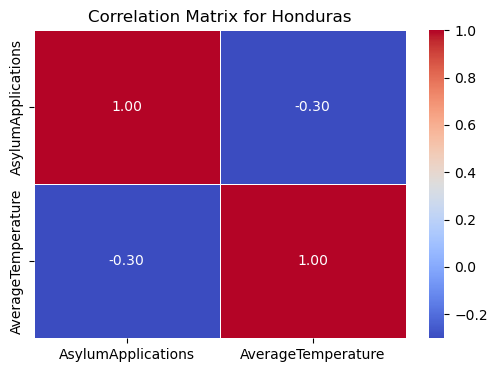

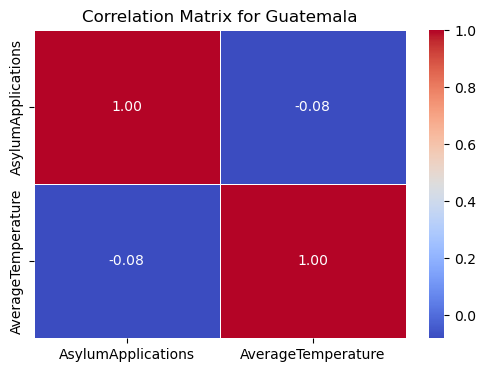

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming df_asylum and df_temp1 are your DataFrames
# most_effected_countries_in_dataset should be a list of countries

# Function to create and visualize correlation matrix for each country
def create_correlation_matrix_for_country(country):
    # Filter and group the data for the country from df_asylum
    df_country_asylum = df_asylum_plus_one[df_asylum_plus_one["Country of origin"] == country]
    applied_by_year_asylum = df_country_asylum.groupby(by=["Year"]).sum()["applied"]

    # Filter and group the data for the country from df_temp1
    df_country_temp1 = df_temp1[df_temp1["Country"] == country]
    average_temp_by_year = df_country_temp1.groupby(by=["Year"])["AverageTemperature"].mean()

    # Combine the two datasets
    combined_df = pd.DataFrame({
        'Year': applied_by_year_asylum.index,
        'AsylumApplications': applied_by_year_asylum.values,
        'AverageTemperature': average_temp_by_year.reindex(applied_by_year_asylum.index).values
    })

    # Drop any rows with NaN values that may have resulted from reindexing
    combined_df.dropna(inplace=True)

    # Calculate the correlation matrix
    correlation_matrix = combined_df[['AsylumApplications', 'AverageTemperature']].corr()

    # Plot the correlation matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Matrix for {country}')
    plt.show()

# Loop through each country and create the correlation matrix
for country in most_effected_countries_in_dataset:
    create_correlation_matrix_for_country(country)

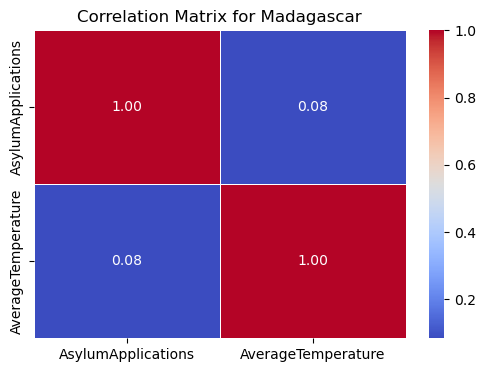

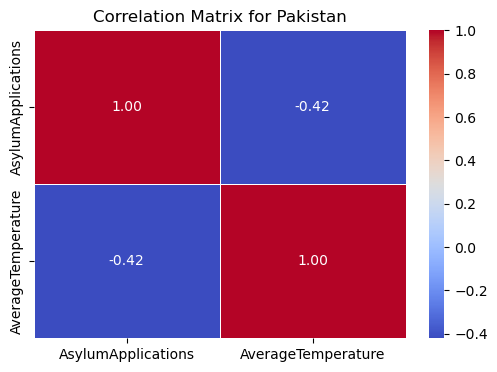

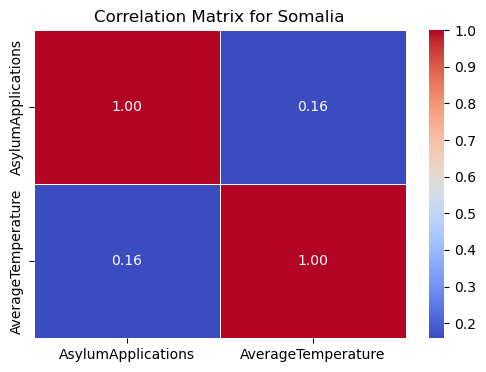

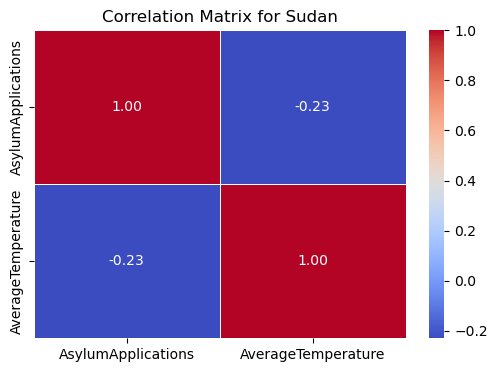

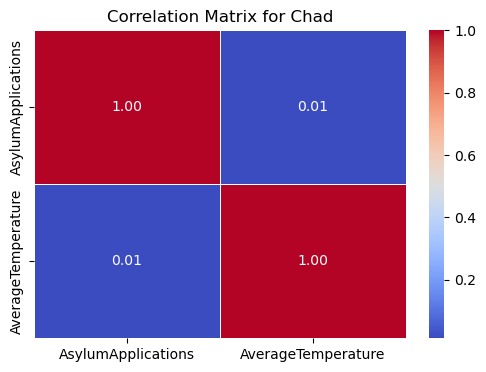

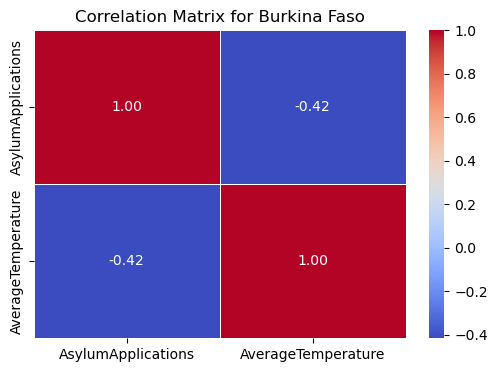

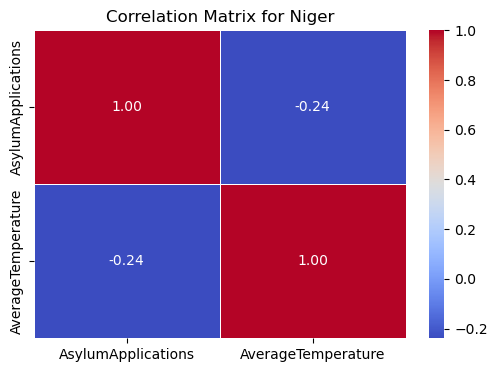

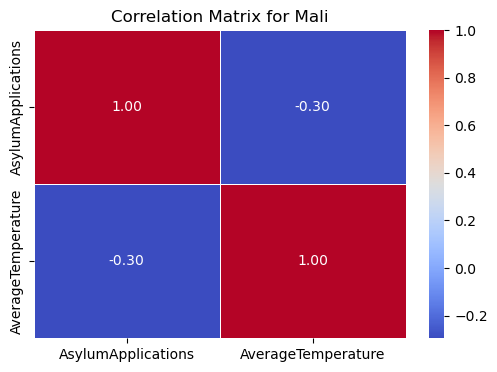

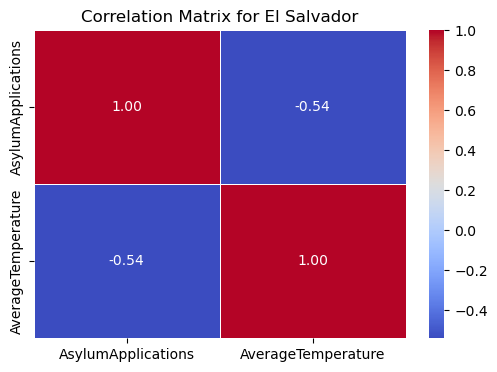

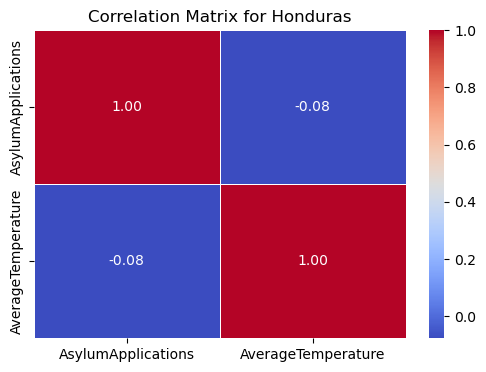

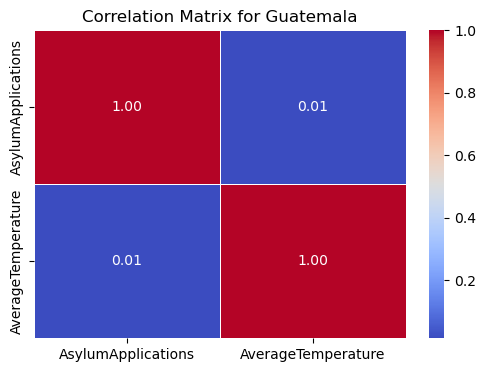

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming df_asylum and df_temp1 are your DataFrames
# most_effected_countries_in_dataset should be a list of countries

# Function to create and visualize correlation matrix for each country
def create_correlation_matrix_for_country(country):
    # Filter and group the data for the country from df_asylum
    df_country_asylum = df_asylum[df_asylum["Country of origin"] == country]
    applied_by_year_asylum = df_country_asylum.groupby(by=["Year"]).sum()["applied"]

    # Filter and group the data for the country from df_temp1
    df_country_temp1 = df_temp1[df_temp1["Country"] == country]
    average_temp_by_year = df_country_temp1.groupby(by=["Year"])["AverageTemperature"].mean()

    # Combine the two datasets
    combined_df = pd.DataFrame({
        'Year': applied_by_year_asylum.index,
        'AsylumApplications': applied_by_year_asylum.values,
        'AverageTemperature': average_temp_by_year.reindex(applied_by_year_asylum.index).values
    })

    # Drop any rows with NaN values that may have resulted from reindexing
    combined_df.dropna(inplace=True)

    # Calculate the correlation matrix
    correlation_matrix = combined_df[['AsylumApplications', 'AverageTemperature']].corr()

    # Plot the correlation matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Correlation Matrix for {country}')
    plt.show()

# Loop through each country and create the correlation matrix
for country in most_effected_countries_in_dataset:
    create_correlation_matrix_for_country(country)


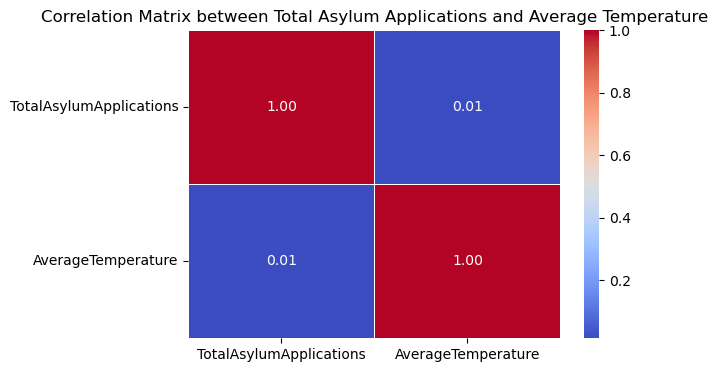

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_asylum and df_temp1 are your DataFrames

for country in most_effected_countries:
    # Aggregate the asylum applications and temperature data
    df_asylum_country = df_asylum[df_asylum["Country of origin"] == country]
    total_asylum_by_year = df_asylum_country.groupby(by=["Year"]).sum()["applied"]
    df_temp1_country = df_temp1[df_temp1["Country"] == country]
    average_temp_by_year = df_temp1_country.groupby(by=["Year"])["AverageTemperature"].sum()

# Combine the aggregated data into a single DataFrame
combined_df = pd.DataFrame({
    'TotalAsylumApplications': total_asylum_by_year,
    'AverageTemperature': average_temp_by_year.reindex(total_asylum_by_year.index).values
})

# Drop any rows with NaN values that may have resulted from reindexing
combined_df.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Total Asylum Applications and Average Temperature')
plt.show()


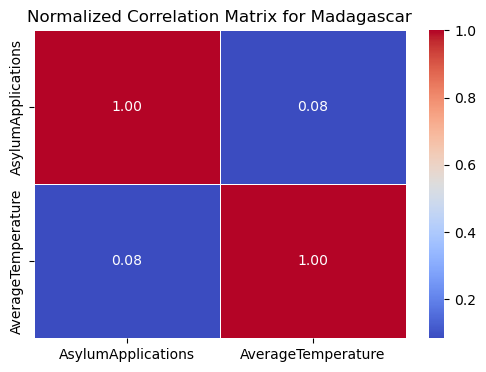

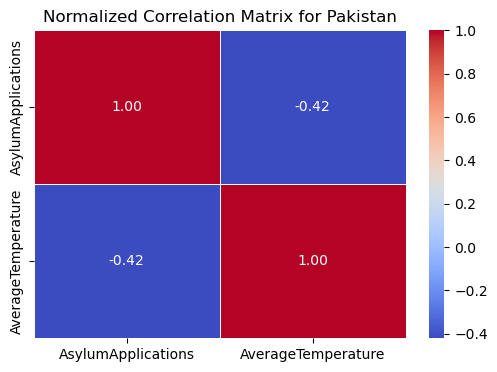

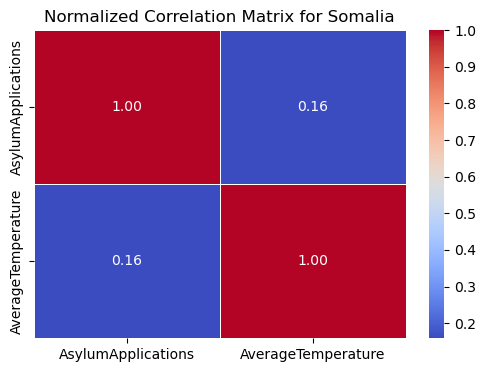

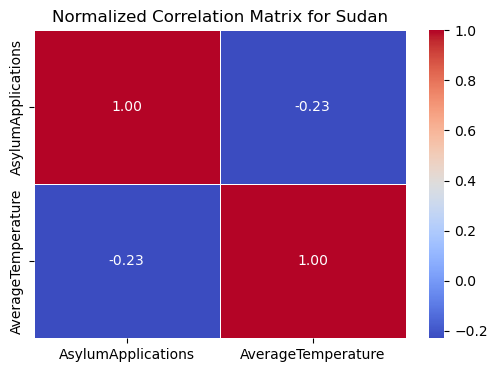

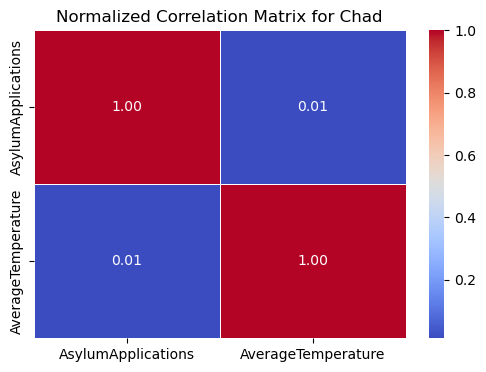

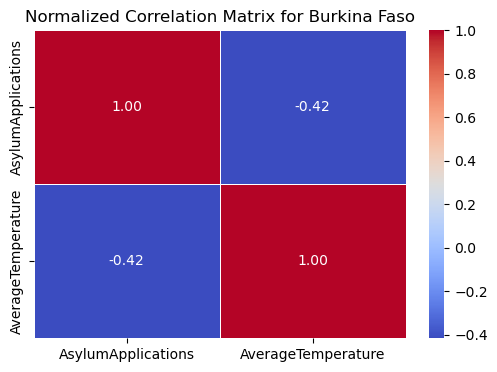

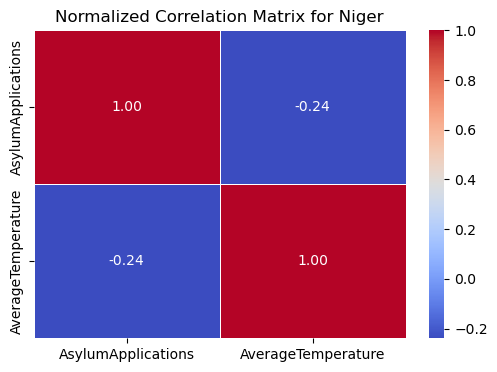

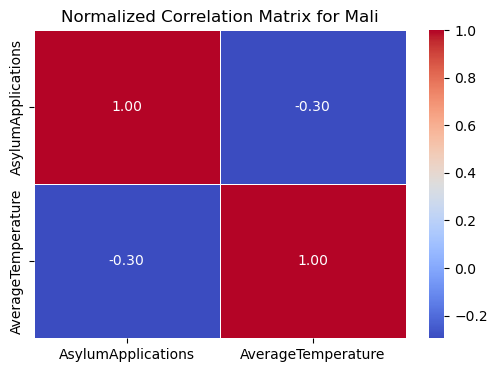

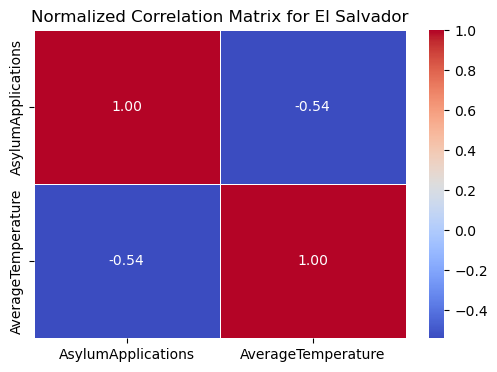

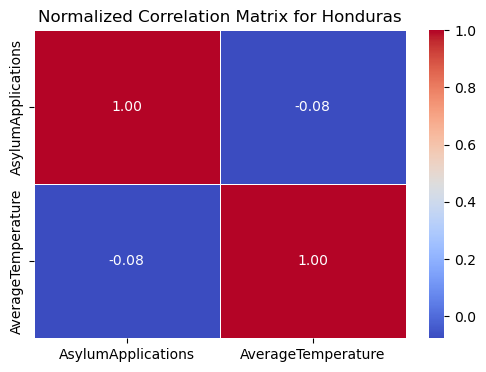

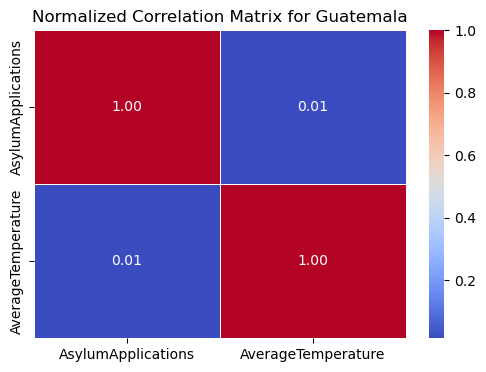

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming df_asylum and df_temp1 are your DataFrames
# most_effected_countries_in_dataset should be a list of countries

# Function to create and visualize normalized correlation matrix for each country
def create_normalized_correlation_matrix_for_country(country):
    # Filter and group the data for the country from df_asylum
    df_country_asylum = df_asylum[df_asylum["Country of origin"] == country]
    applied_by_year_asylum = df_country_asylum.groupby(by=["Year"]).sum()["applied"]

    # Filter and group the data for the country from df_temp1
    df_country_temp1 = df_temp1[df_temp1["Country"] == country]
    average_temp_by_year = df_country_temp1.groupby(by=["Year"])["AverageTemperature"].mean()

    # Combine the two datasets
    combined_df = pd.DataFrame({
        'Year': applied_by_year_asylum.index,
        'AsylumApplications': applied_by_year_asylum.values,
        'AverageTemperature': average_temp_by_year.reindex(applied_by_year_asylum.index).values
    })

    # Drop any rows with NaN values that may have resulted from reindexing
    combined_df.dropna(inplace=True)

    # Normalize the data
    scaler = MinMaxScaler()
    normalized_values = scaler.fit_transform(combined_df[['AsylumApplications', 'AverageTemperature']])
    normalized_df = pd.DataFrame(normalized_values, columns=['AsylumApplications', 'AverageTemperature'])

    # Calculate the correlation matrix
    correlation_matrix = normalized_df.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(f'Normalized Correlation Matrix for {country}')
    plt.show()

# Loop through each country and create the normalized correlation matrix
for country in most_effected_countries_in_dataset:
    create_normalized_correlation_matrix_for_country(country)
